In [94]:
#작업폴도로 이동
%cd /content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트

/content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트


In [95]:
pwd

'/content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트'

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [57]:
#코랩에서 plt 한글 깨짐 해결
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 위의 모듈 설치 후 메뉴[런타임-런타임 다시 시작]을 해야 함

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = 'NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
fm._rebuild()

In [97]:
from konlpy.tag import Okt, Mecab
import pandas as pd
import numpy as np
import seaborn as sns
#워드 클라우드
from wordcloud import WordCloud

mecab = Mecab()

In [98]:
df=pd.read_csv('./최종_전세사기_all_.csv')
df.head()

,Unnamed: 0,title,내용,내용1(응답),description,태그,날짜,조회수,link
0,0,서울 갭투자,재개발 말이나오는 지역에 갭투자를 했는데요 재작년 말쯤이었고 원래는 세대원으로 살다...,재개발의 경우는 서울 투자한 곳에 실거주하지 않아도 조합원 자격이 ...,재개발 말이나오는 지역에 <b>갭투자</b>를 했는데요 재작년 말쯤이었고 원래는 세...,"분양, 청약",2022.10.05,48.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
1,1,부동산 경매 갭투자,부동산 경매와 갭투자는 어떤구조로 되어있는지 각각 알려주세요 수익금은 둘중 뭐가더 ...,"안녕하세요, 질문자님​부동산경매와 갭투자에 대해 질문을 주셨네요!​...",부동산 경매와 <b>갭투자</b>는 어떤구조로 되어있는지 각각 알려주세요 수익금은....,경매,2022.09.04,370.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
2,2,갭투자에 관한 질문이에요.,NaN,질문에 답변드리겠습니다. 갭투자를 한 후 현 임차인이 퇴거를 하는 ...,<b>갭투자</b>에 관한 질문이에요. 집값이 떨어질 때 제가 집을 매매하려고 하잖...,매매,2022.09.13,90.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
3,3,김포 빌라 갭투자,제가 김포쪽으로 신축빌라를 하나 사서 제 지인에게 전세를 놓고 싶은데 전세가 안되는...,네전세는 다 놓을수있어요근데 요즘 집값이 떨어지는 추세라 전셋값도 ...,... 아무 집이든 <b>갭투자</b>가 가능한건가요? 안녕하세요... 집과사람들...,매매,2022.10.02,62.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
4,4,개인회생 개시결정후 갭투자,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습니다.그런데 아버...,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습...,... 그런데 아버지가 부동산업을 하시는데 부동산을 <b>갭투자</b>를 전세 1억...,"신용, 파산",2022.06.05,216.0,https://kin.naver.com/qna/detail.naver?d1id=6&...


# 명사 추출

## 1. 제목에서 명사 추출

In [100]:
#제목에서 명사 추출
nouns=[mecab.nouns(i) for i in df['title']]


In [101]:
nouns[:10]

[['서울', '갭', '투자'],
 ['부동산', '경매', '갭', '투자'],
 ['갭', '투자', '질문'],
 ['김포', '빌라', '갭', '투자'],
 ['개인', '회생', '개시', '결정', '후', '갭', '투자'],
 ['갭', '투자', '담보', '대출', '공문서', '위조'],
 ['갭', '투자', '뜻'],
 ['갭', '투자'],
 ['부동산', '전세', '갭', '투자', '질문'],
 ['갭', '투자', '질문']]

In [102]:
# 문서별 제목 명사 추출 pickle로 저장

import pickle
with open('nouns_title.pickle', 'wb') as f:
    pickle.dump(nouns, f, pickle.HIGHEST_PROTOCOL)

# load
# with open('nouns.pickle', 'rb') as f:
#     data = pickle.load(f)

# 2. 단어 필드 제목 _ 단어 unique

In [103]:
wordList=[]
vocab=sorted(list(set([n for i in nouns for n in i])))

In [104]:
vocab[:10]

['ㅂ', '有', '가게', '가격', '가계', '가계약', '가구', '가능', '가담', '가도']

In [118]:
#stopword
stopword=['관련','문','질문','시','사항','주','일','것','수','거','ㅂ','有','때']

vocab=[i for i in vocab if i not in stopword]
vocab[:10]

['가게', '가격', '가계', '가계약', '가구', '가능', '가담', '가도', '가등기', '가량']

# 3. TF

In [119]:
dtm=[]
for i in nouns:
    dtm.append([])
    for j in vocab:
        dtm[-1].append(i.count(j))
tf_df=pd.DataFrame(dtm, columns=vocab)


In [120]:
tf_df

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#tf_df pickle로 저장
import pickle
with open('title_tf_df.pickle', 'wb') as f:
    pickle.dump(tf_df, f, pickle.HIGHEST_PROTOCOL)


# 4. IDF

In [122]:
D=len(tf_df) #총문서수
df=tf_df.astype(bool).sum()
idf=np.log10(D/(df+1))
idf

가게     3.051538
가격     2.653598
가계     3.051538
가계약    2.507470
가구     2.352568
         ...   
후반     3.051538
후보     3.051538
후속     2.507470
흥원     3.051538
힐      2.875447
Length: 1126, dtype: float64

In [123]:
#idf pickle로 저장
with open('title_idf.pickle', 'wb') as f:
    pickle.dump(idf, f, pickle.HIGHEST_PROTOCOL)

# 5. TF_IDF

In [124]:
tfidf=tf_df*idf
tfidf

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.954628,0.0,0.0,1.7191,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


In [127]:
#tfidf_ pickle로 저장
with open('title_tfidf_df.pickle', 'wb') as f:
    pickle.dump(tfidf, f, pickle.HIGHEST_PROTOCOL)

In [126]:
tfidf.corr()

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
가게,1.000000,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가격,-0.000889,1.000000,-0.000889,-0.002180,-0.002672,-0.008405,-0.001541,-0.001258,-0.000889,-0.000889,...,-0.002355,-0.004378,-0.001258,-0.001541,-0.005751,-0.000889,-0.000889,-0.002180,-0.000889,-0.001258
가계,-0.000444,-0.000889,1.000000,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가계약,-0.001089,-0.002180,-0.001089,1.000000,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,-0.002671,-0.001089,-0.001541
가구,-0.001335,-0.002672,-0.001335,-0.003274,1.000000,-0.012622,-0.002314,-0.001889,-0.001335,-0.001335,...,-0.003537,-0.006574,-0.001889,-0.002314,-0.008635,-0.001335,-0.001335,-0.003274,-0.001335,-0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후반,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,1.000000,-0.000444,-0.001089,-0.000444,-0.000628
후보,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,1.000000,-0.001089,-0.000444,-0.000628
후속,-0.001089,-0.002180,-0.001089,-0.002671,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,1.000000,-0.001089,-0.001541
흥원,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,1.000000,-0.000628


# # 상위노출(50)개 단어 (상관관계): TF

In [128]:
vocab_50=tf_df.sum().sort_values(ascending=False)[:50].index

In [129]:
vocab_50

Index(['전세', '사기', '깡통', '계약', '대출', '부동산', '빌라', '집', '투자', '갭', '문의', '주인',
       '방법', '신축', '보험', '보증', '가능', '보증금', '경매', '오피스텔', '반환', '매매', '신탁',
       '소송', '공인', '중개사', '중', '부탁', '후', '중개', '전세금', '원룸', '월세', '아파트', '확인',
       '의심', '주택', '경우', '내공', '분양', '안심', '중기청', '여부', '세입자', '임대인', '법',
       '고소', '위험', '담보', '계약서'],
      dtype='object')

In [130]:
vocab_50

Index(['전세', '사기', '깡통', '계약', '대출', '부동산', '빌라', '집', '투자', '갭', '문의', '주인',
       '방법', '신축', '보험', '보증', '가능', '보증금', '경매', '오피스텔', '반환', '매매', '신탁',
       '소송', '공인', '중개사', '중', '부탁', '후', '중개', '전세금', '원룸', '월세', '아파트', '확인',
       '의심', '주택', '경우', '내공', '분양', '안심', '중기청', '여부', '세입자', '임대인', '법',
       '고소', '위험', '담보', '계약서'],
      dtype='object')

In [131]:
tf_50=tf_df[vocab_50]

In [132]:
tf_50

,전세,사기,깡통,계약,대출,부동산,빌라,집,투자,갭,...,안심,중기청,여부,세입자,임대인,법,고소,위험,담보,계약서
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
tf_50.columns

Index(['전세', '사기', '깡통', '계약', '대출', '부동산', '빌라', '집', '투자', '갭', '문의', '주인',
       '방법', '신축', '보험', '보증', '가능', '보증금', '경매', '오피스텔', '반환', '매매', '신탁',
       '소송', '공인', '중개사', '중', '부탁', '후', '중개', '전세금', '원룸', '월세', '아파트', '확인',
       '의심', '주택', '경우', '내공', '분양', '안심', '중기청', '여부', '세입자', '임대인', '법',
       '고소', '위험', '담보', '계약서'],
      dtype='object')

In [134]:
tf_50.corr()

,전세,사기,깡통,계약,대출,부동산,빌라,집,투자,갭,...,안심,중기청,여부,세입자,임대인,법,고소,위험,담보,계약서
전세,1.000000,0.503692,0.346761,-0.002265,0.121440,-0.123689,0.015318,-0.035598,-0.196767,-0.189148,...,0.132621,0.077202,-0.002844,-0.047134,-0.006655,-0.000518,-0.015412,0.094137,-0.070086,-0.010786
사기,0.503692,1.000000,-0.071003,-0.153724,-0.019138,-0.068931,-0.024385,-0.100174,-0.164345,-0.159157,...,0.015305,-0.010575,0.040528,-0.100839,-0.033542,0.063193,0.090357,0.090357,-0.098992,-0.020657
깡통,0.346761,-0.071003,1.000000,-0.003967,-0.043975,-0.063059,-0.030434,-0.025901,-0.025672,-0.022673,...,0.066943,0.035035,0.035035,0.024581,-0.030677,-0.019894,-0.030757,-0.030757,-0.041979,-0.040629
계약,-0.002265,-0.153724,-0.003967,1.000000,-0.084079,0.039286,0.005954,-0.003086,-0.064622,-0.062664,...,0.002605,-0.029357,0.025958,-0.016848,0.006204,-0.016399,-0.015414,0.042477,-0.026167,0.054393
대출,0.121440,-0.019138,-0.043975,-0.084079,1.000000,-0.084168,-0.058594,-0.050203,-0.016032,-0.013330,...,0.185844,0.033453,0.009422,-0.036939,-0.000320,-0.037468,-0.036870,-0.036870,0.334348,-0.010358
부동산,-0.123689,-0.068931,-0.063059,0.039286,-0.084168,1.000000,-0.062729,-0.047130,0.024381,0.006576,...,-0.036040,-0.035513,-0.008934,-0.033951,-0.033395,0.006639,-0.019979,-0.033887,-0.019194,0.049825
빌라,0.015318,-0.024385,-0.030434,0.005954,-0.058594,-0.062729,1.000000,-0.028593,0.002200,-0.002499,...,0.035753,-0.029642,-0.029642,-0.002027,-0.014530,0.012539,-0.028285,-0.028285,-0.013613,0.000574
집,-0.035598,-0.100174,-0.025901,-0.003086,-0.050203,-0.047130,-0.028593,1.000000,0.010640,0.013260,...,0.010536,-0.031345,-0.017027,0.096961,-0.015170,-0.015643,0.045015,0.000060,-0.014188,-0.028471
투자,-0.196767,-0.164345,-0.025672,-0.064622,-0.016032,0.024381,0.002200,0.010640,1.000000,0.971732,...,-0.031478,-0.031018,-0.015571,-0.014438,-0.029168,-0.030079,-0.029598,-0.013432,0.020180,-0.028174
갭,-0.189148,-0.159157,-0.022673,-0.062664,-0.013330,0.006576,-0.002499,0.013260,0.971732,1.000000,...,-0.030845,-0.030394,-0.014666,-0.013565,-0.028581,-0.029473,-0.029002,-0.012542,0.021661,-0.027607


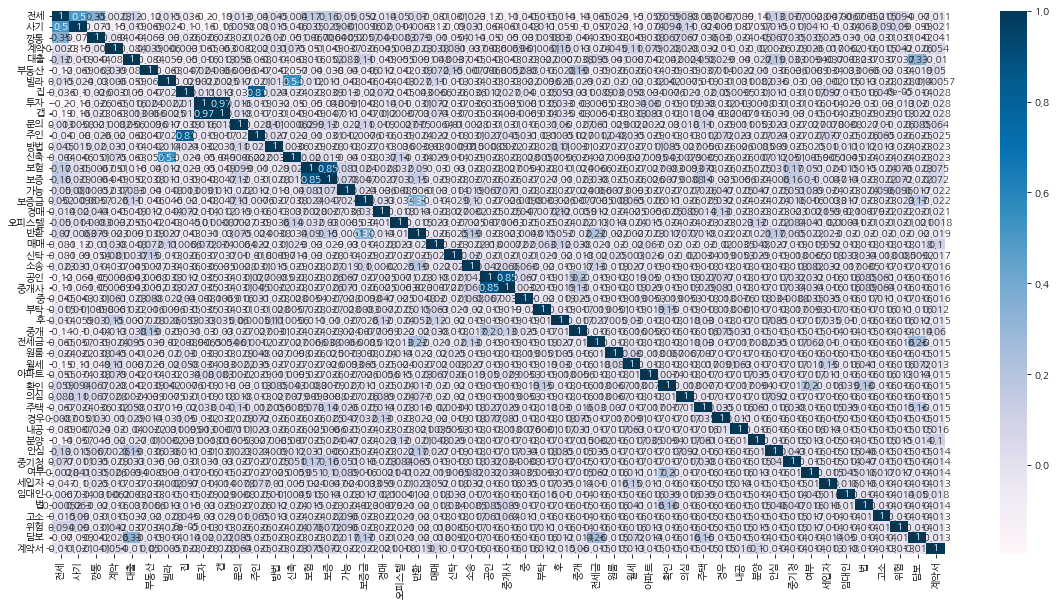

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(tf_50.corr(),annot=True,cmap = 'PuBu')

In [136]:
tf50_corr=tf_50.corr()

In [137]:
tf50_corr[tf50_corr['전세']>=0.3]

,전세,사기,깡통,계약,대출,부동산,빌라,집,투자,갭,...,안심,중기청,여부,세입자,임대인,법,고소,위험,담보,계약서
전세,1.000000,0.503692,0.346761,-0.002265,0.121440,-0.123689,0.015318,-0.035598,-0.196767,-0.189148,...,0.132621,0.077202,-0.002844,-0.047134,-0.006655,-0.000518,-0.015412,0.094137,-0.070086,-0.010786
사기,0.503692,1.000000,-0.071003,-0.153724,-0.019138,-0.068931,-0.024385,-0.100174,-0.164345,-0.159157,...,0.015305,-0.010575,0.040528,-0.100839,-0.033542,0.063193,0.090357,0.090357,-0.098992,-0.020657
깡통,0.346761,-0.071003,1.000000,-0.003967,-0.043975,-0.063059,-0.030434,-0.025901,-0.025672,-0.022673,...,0.066943,0.035035,0.035035,0.024581,-0.030677,-0.019894,-0.030757,-0.030757,-0.041979,-0.040629


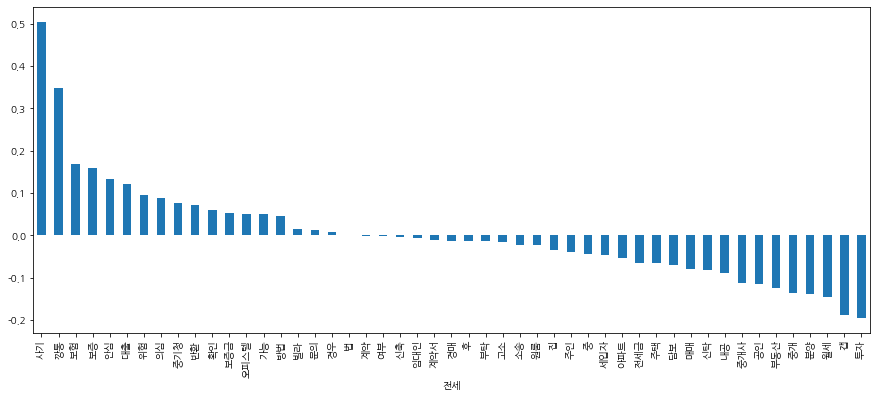

In [138]:
#특정단어와 관련한 상관관계
search='전세'
tf50_corr[search].sort_values(ascending=False)[1:].plot(kind='bar',figsize=(15,6))
plt.xlabel(search)
plt.savefig(f'./제목분석/{search}_freq50_tf.png')
plt.show()

# # 특정 단어 (상관관계): TF 전체 데이터

In [139]:
#전체 단어 상관계수
tf_df_corr=tf_df.corr()
tf_df_corr

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
가게,1.000000,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가격,-0.000889,1.000000,-0.000889,-0.002180,-0.002672,-0.008405,-0.001541,-0.001258,-0.000889,-0.000889,...,-0.002355,-0.004378,-0.001258,-0.001541,-0.005751,-0.000889,-0.000889,-0.002180,-0.000889,-0.001258
가계,-0.000444,-0.000889,1.000000,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가계약,-0.001089,-0.002180,-0.001089,1.000000,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,-0.002671,-0.001089,-0.001541
가구,-0.001335,-0.002672,-0.001335,-0.003274,1.000000,-0.012622,-0.002314,-0.001889,-0.001335,-0.001335,...,-0.003537,-0.006574,-0.001889,-0.002314,-0.008635,-0.001335,-0.001335,-0.003274,-0.001335,-0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후반,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,1.000000,-0.000444,-0.001089,-0.000444,-0.000628
후보,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,1.000000,-0.001089,-0.000444,-0.000628
후속,-0.001089,-0.002180,-0.001089,-0.002671,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,1.000000,-0.001089,-0.001541
흥원,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,1.000000,-0.000628


In [140]:
tfidf_corr=tfidf.corr()
tfidf_corr

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
가게,1.000000,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가격,-0.000889,1.000000,-0.000889,-0.002180,-0.002672,-0.008405,-0.001541,-0.001258,-0.000889,-0.000889,...,-0.002355,-0.004378,-0.001258,-0.001541,-0.005751,-0.000889,-0.000889,-0.002180,-0.000889,-0.001258
가계,-0.000444,-0.000889,1.000000,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가계약,-0.001089,-0.002180,-0.001089,1.000000,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,-0.002671,-0.001089,-0.001541
가구,-0.001335,-0.002672,-0.001335,-0.003274,1.000000,-0.012622,-0.002314,-0.001889,-0.001335,-0.001335,...,-0.003537,-0.006574,-0.001889,-0.002314,-0.008635,-0.001335,-0.001335,-0.003274,-0.001335,-0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후반,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,1.000000,-0.000444,-0.001089,-0.000444,-0.000628
후보,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,1.000000,-0.001089,-0.000444,-0.000628
후속,-0.001089,-0.002180,-0.001089,-0.002671,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,1.000000,-0.001089,-0.001541
흥원,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,1.000000,-0.000628


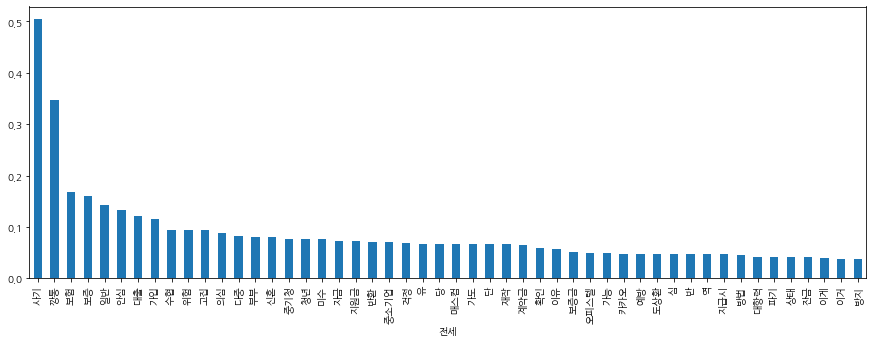

In [141]:
search='전세'
cnt=50

tf_df_corr[search].sort_values(ascending=False)[1:cnt+1].plot(kind='bar',figsize=(15,5))
plt.xlabel(search)
plt.savefig(f'./제목분석/{search}_전체단어_tf.png')
plt.show()

# 상관계수 네트워크 차트(1) 전체단어 tfidf_corr

In [142]:
tfidf_corr

,가게,가격,가계,가계약,가구,가능,가담,가도,가등기,가량,...,회사,회생,회수,효력,후,후반,후보,후속,흥원,힐
가게,1.000000,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가격,-0.000889,1.000000,-0.000889,-0.002180,-0.002672,-0.008405,-0.001541,-0.001258,-0.000889,-0.000889,...,-0.002355,-0.004378,-0.001258,-0.001541,-0.005751,-0.000889,-0.000889,-0.002180,-0.000889,-0.001258
가계,-0.000444,-0.000889,1.000000,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,-0.000444,-0.000628
가계약,-0.001089,-0.002180,-0.001089,1.000000,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,-0.002671,-0.001089,-0.001541
가구,-0.001335,-0.002672,-0.001335,-0.003274,1.000000,-0.012622,-0.002314,-0.001889,-0.001335,-0.001335,...,-0.003537,-0.006574,-0.001889,-0.002314,-0.008635,-0.001335,-0.001335,-0.003274,-0.001335,-0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후반,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,1.000000,-0.000444,-0.001089,-0.000444,-0.000628
후보,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,1.000000,-0.001089,-0.000444,-0.000628
후속,-0.001089,-0.002180,-0.001089,-0.002671,-0.003274,-0.010299,-0.001888,-0.001541,-0.001089,-0.001089,...,-0.002886,-0.005364,-0.001541,-0.001888,-0.007046,-0.001089,-0.001089,1.000000,-0.001089,-0.001541
흥원,-0.000444,-0.000889,-0.000444,-0.001089,-0.001335,-0.004200,-0.000770,-0.000628,-0.000444,-0.000444,...,-0.001177,-0.002188,-0.000628,-0.000770,-0.002873,-0.000444,-0.000444,-0.001089,1.000000,-0.000628


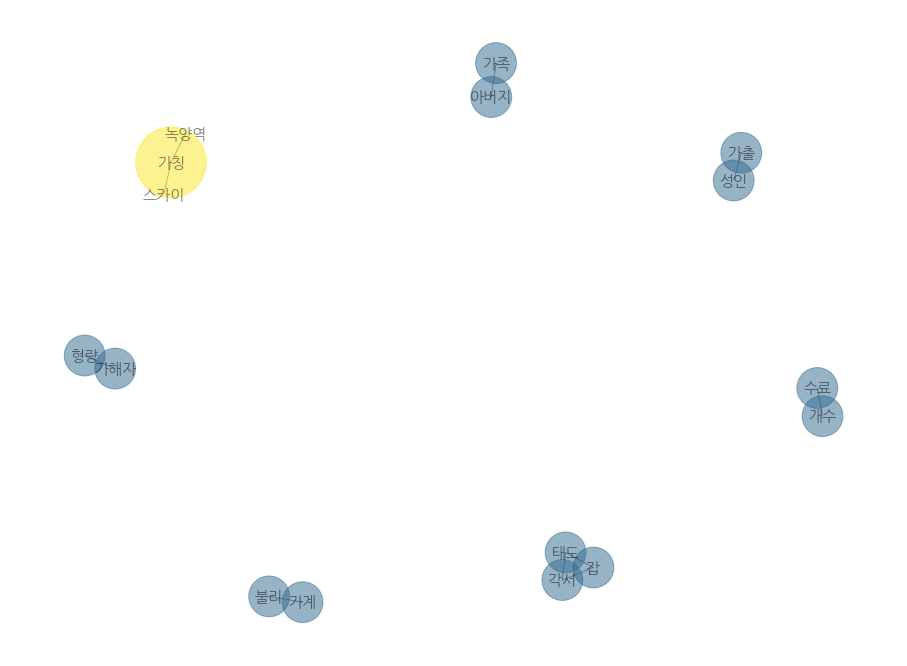

In [143]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tfidf_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tfidf_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈(단어빈도수)
nsize=np.array([v for v in pr.values()])
nsize=5000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./제목분석/네트워크차트_전체단어_tfidf.png')
plt.show()

# 상관계수 네트워크 차트(2) 전체단어 tf_df_corr

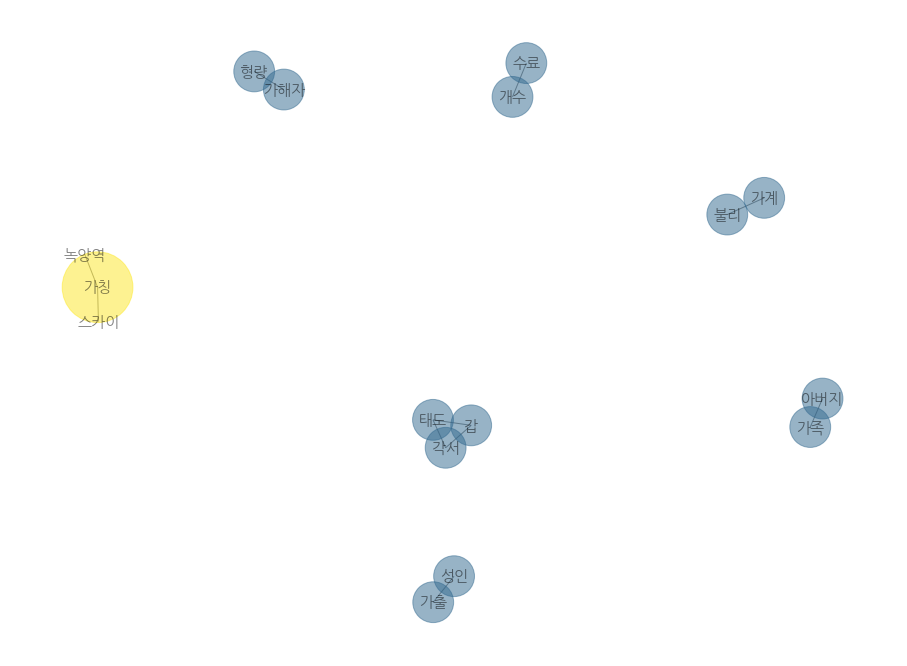

In [144]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tf_df_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tf_df_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈(단어빈도수)
nsize=np.array([v for v in pr.values()])
nsize=5000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./제목분석/네트워크차트_전체단어_tf.png')
plt.show()

# 상관계수 네트워크 차트(2) 상위노출 50단어 tfidf50_corr

In [145]:
tfidf50_corr

,전세,사기,깡통,계약,대출,부동산,집,빌라,투자,갭,...,분양,중기청,여부,때,세입자,법,고소,위험,임대인,담보
전세,1.000000,0.503692,0.346761,-0.002265,0.121440,-0.123689,-0.035598,0.015318,-0.196767,-0.189148,...,-0.138866,0.077202,-0.002844,0.032669,-0.047134,-0.000518,-0.015412,0.094137,-0.006655,-0.070086
사기,0.503692,1.000000,-0.071003,-0.153724,-0.019138,-0.068931,-0.100174,-0.024385,-0.164345,-0.159157,...,-0.057306,-0.010575,0.040528,-0.044625,-0.100839,0.063193,0.090357,0.090357,-0.033542,-0.098992
깡통,0.346761,-0.071003,1.000000,-0.003967,-0.043975,-0.063059,-0.025901,-0.030434,-0.025672,-0.022673,...,-0.044800,0.035035,0.035035,0.013762,0.024581,-0.019894,-0.030757,-0.030757,-0.030677,-0.041979
계약,-0.002265,-0.153724,-0.003967,1.000000,-0.084079,0.039286,-0.003086,0.005954,-0.064622,-0.062664,...,-0.019554,-0.029357,0.025958,0.038776,-0.016848,-0.016399,-0.015414,0.042477,0.006204,-0.026167
대출,0.121440,-0.019138,-0.043975,-0.084079,1.000000,-0.084168,-0.050203,-0.058594,-0.016032,-0.013330,...,-0.027334,0.033453,0.009422,0.059488,-0.036939,-0.037468,-0.036870,-0.036870,-0.000320,0.334348
부동산,-0.123689,-0.068931,-0.063059,0.039286,-0.084168,1.000000,-0.047130,-0.062729,0.024381,0.006576,...,-0.010427,-0.035513,-0.008934,-0.008007,-0.033951,0.006639,-0.019979,-0.033887,-0.033395,-0.019194
집,-0.035598,-0.100174,-0.025901,-0.003086,-0.050203,-0.047130,1.000000,-0.028593,0.010640,0.013260,...,-0.031394,-0.031345,-0.017027,0.158020,0.096961,-0.015643,0.045015,0.000060,-0.015170,-0.014188
빌라,0.015318,-0.024385,-0.030434,0.005954,-0.058594,-0.062729,-0.028593,1.000000,0.002200,-0.002499,...,0.008213,-0.029642,-0.029642,0.038573,-0.002027,0.012539,-0.028285,-0.028285,-0.014530,-0.013613
투자,-0.196767,-0.164345,-0.025672,-0.064622,-0.016032,0.024381,0.010640,0.002200,1.000000,0.971732,...,-0.001843,-0.031018,-0.015571,0.047829,-0.014438,-0.030079,-0.029598,-0.013432,-0.029168,0.020180
갭,-0.189148,-0.159157,-0.022673,-0.062664,-0.013330,0.006576,0.013260,-0.002499,0.971732,1.000000,...,-0.015564,-0.030394,-0.014666,0.049866,-0.013565,-0.029473,-0.029002,-0.012542,-0.028581,0.021661


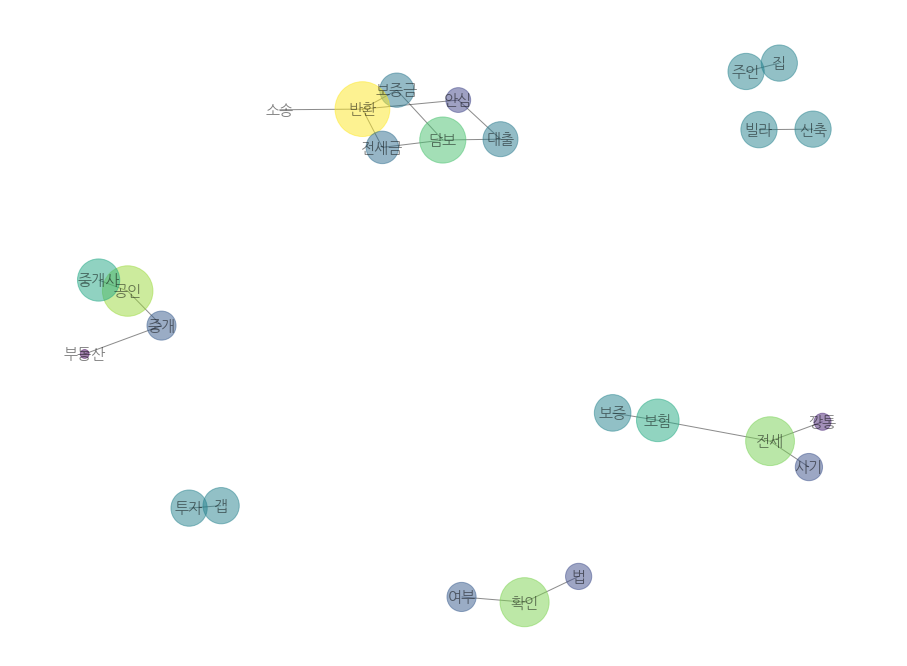

In [146]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tfidf50_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tfidf50_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=20

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈(단어빈도수)
nsize=np.array([v for v in pr.values()])
nsize=3000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./제목분석/네트워크차트_fre50_tfidf.png')
plt.show()

# 상관계수 네트워크 차트(3) 상위노출 50단어 tf50_corr

In [147]:
tf50_corr

,전세,사기,깡통,계약,대출,부동산,빌라,집,투자,갭,...,안심,중기청,여부,세입자,임대인,법,고소,위험,담보,계약서
전세,1.000000,0.503692,0.346761,-0.002265,0.121440,-0.123689,0.015318,-0.035598,-0.196767,-0.189148,...,0.132621,0.077202,-0.002844,-0.047134,-0.006655,-0.000518,-0.015412,0.094137,-0.070086,-0.010786
사기,0.503692,1.000000,-0.071003,-0.153724,-0.019138,-0.068931,-0.024385,-0.100174,-0.164345,-0.159157,...,0.015305,-0.010575,0.040528,-0.100839,-0.033542,0.063193,0.090357,0.090357,-0.098992,-0.020657
깡통,0.346761,-0.071003,1.000000,-0.003967,-0.043975,-0.063059,-0.030434,-0.025901,-0.025672,-0.022673,...,0.066943,0.035035,0.035035,0.024581,-0.030677,-0.019894,-0.030757,-0.030757,-0.041979,-0.040629
계약,-0.002265,-0.153724,-0.003967,1.000000,-0.084079,0.039286,0.005954,-0.003086,-0.064622,-0.062664,...,0.002605,-0.029357,0.025958,-0.016848,0.006204,-0.016399,-0.015414,0.042477,-0.026167,0.054393
대출,0.121440,-0.019138,-0.043975,-0.084079,1.000000,-0.084168,-0.058594,-0.050203,-0.016032,-0.013330,...,0.185844,0.033453,0.009422,-0.036939,-0.000320,-0.037468,-0.036870,-0.036870,0.334348,-0.010358
부동산,-0.123689,-0.068931,-0.063059,0.039286,-0.084168,1.000000,-0.062729,-0.047130,0.024381,0.006576,...,-0.036040,-0.035513,-0.008934,-0.033951,-0.033395,0.006639,-0.019979,-0.033887,-0.019194,0.049825
빌라,0.015318,-0.024385,-0.030434,0.005954,-0.058594,-0.062729,1.000000,-0.028593,0.002200,-0.002499,...,0.035753,-0.029642,-0.029642,-0.002027,-0.014530,0.012539,-0.028285,-0.028285,-0.013613,0.000574
집,-0.035598,-0.100174,-0.025901,-0.003086,-0.050203,-0.047130,-0.028593,1.000000,0.010640,0.013260,...,0.010536,-0.031345,-0.017027,0.096961,-0.015170,-0.015643,0.045015,0.000060,-0.014188,-0.028471
투자,-0.196767,-0.164345,-0.025672,-0.064622,-0.016032,0.024381,0.002200,0.010640,1.000000,0.971732,...,-0.031478,-0.031018,-0.015571,-0.014438,-0.029168,-0.030079,-0.029598,-0.013432,0.020180,-0.028174
갭,-0.189148,-0.159157,-0.022673,-0.062664,-0.013330,0.006576,-0.002499,0.013260,0.971732,1.000000,...,-0.030845,-0.030394,-0.014666,-0.013565,-0.028581,-0.029473,-0.029002,-0.012542,0.021661,-0.027607


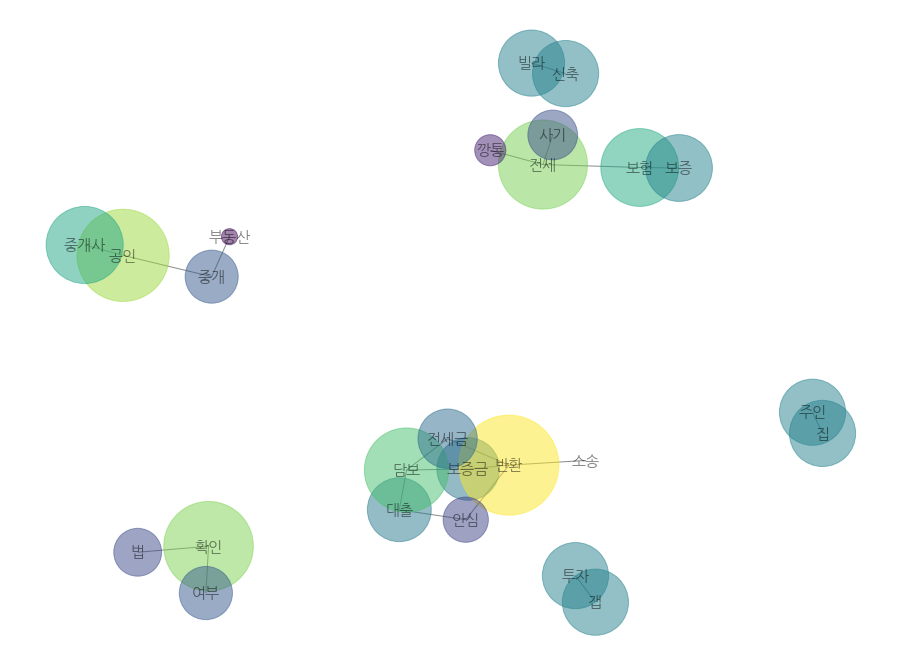

In [148]:
### 단어의 집합별 상관계수 값 리스트화 하기
words=tf50_corr.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], tf50_corr.iloc[i,j]))
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)

###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능

##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]

import networkx as nx

G = nx.Graph()
rank=20

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))

pr=nx.pagerank(G)

#노드 사이즈
nsize=np.array([v for v in pr.values()])
nsize=10000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.savefig('./제목분석/네트워크차트_fre50_tf.png')
plt.show()